# Major Project : Predictive Analysis & Customer Segmentation for a E-Commerce Project

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ecommerce-dataset/data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/online-retail-ecommerce-dataset/data.csv',encoding='ISO-8859-1')

In [4]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
176103,551995,22197,SMALL POPCORN HOLDER,2,5/5/2011 15:42,1.63,NaN,United Kingdom
529023,580730,22379,RECYCLING BAG RETROSPOT,3,12/5/2011 17:28,4.13,NaN,United Kingdom
239888,558068,37500,TEA TIME TEAPOT IN GIFT BOX,2,6/24/2011 15:51,8.29,NaN,United Kingdom
414233,572399,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,10/24/2011 11:56,2.95,15628.0,United Kingdom
67344,541830,22280,POCKET BAG PINK PAISELY BROWN SPOT,2,1/21/2011 17:09,0.83,NaN,United Kingdom
238735,557955,84687,BEACH HUT SHELF W 3 DRAWERS,2,6/23/2011 18:59,5.95,16175.0,United Kingdom
376358,569523,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,4,10/4/2011 14:41,1.45,16033.0,United Kingdom
389178,570465,23108,SET OF 10 LED DOLLY LIGHTS,1,10/10/2011 16:02,12.46,NaN,United Kingdom
418074,572688,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,24,10/25/2011 14:09,0.39,13028.0,United Kingdom
369099,569014,23329,DECORATIVE WICKER HEART LARGE,12,9/30/2011 9:05,1.65,18053.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


> **The Quantity and Unit price can't be practically be negative, so lets drop the negative values**

In [8]:
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [10]:
df['Description'].nunique()

4026

In [11]:
df['StockCode'].nunique()

3922

In [12]:
df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

StockCode
23236     4
23196     4
17107D    3
23366     3
23203     3
         ..
22421     1
22422     1
22423     1
22424     1
m         1
Name: Description, Length: 3922, dtype: int64

In [13]:
k=pd.DataFrame(df.groupby('Description')['StockCode'].nunique())
k.columns=["StockCodeCount"]
l=k[k['StockCodeCount']>1].index.values.tolist()


In [14]:
for description in l:
    stockcode_f=df[df['Description']==description]['StockCode'].unique()[0]
    df.loc[df['Description']==description,'StockCode']=stockcode_f

In [15]:
k=pd.DataFrame(df.groupby('StockCode')['Description'].nunique())
l=k[k['Description']>1].index.values.tolist()


In [16]:

for stockcode in l:
    stockcode_f=df[df['StockCode']==stockcode]['Description'].unique()[0]
    df.loc[df['StockCode']==stockcode,'Description']=stockcode_f

# Checking for Duplicates

In [17]:
df[df.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate'],keep='last')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,12/1/2010 9:41,1.25,15311.0,United Kingdom
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,12/1/2010 11:45,6.35,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541659,581538,22899,CHILDREN'S APRON DOLLY GIRL,2,12/9/2011 11:34,2.10,14446.0,United Kingdom
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,12/9/2011 11:34,2.08,14446.0,United Kingdom
541674,581538,35004B,SET OF 3 BLACK FLYING DUCKS,2,12/9/2011 11:34,5.45,14446.0,United Kingdom


In [18]:
df[(df['InvoiceNo']=='581538') & (df['StockCode']=='21194')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541684,581538,21194,PINK HONEYCOMB PAPER FAN,2,12/9/2011 11:34,0.65,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,12/9/2011 11:34,0.65,14446.0,United Kingdom


Lets Remove The duplicates

In [19]:
i=df[df.duplicated(subset=['InvoiceNo','StockCode','InvoiceDate'],keep='last')].index
df.drop(i,inplace=True)

In [20]:
df=df[~df['CustomerID'].isnull()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Adding Extra Columns to infer more information

In [21]:
data=df.copy()

In [22]:
# GROSS ORDER VALUE
data['GOV']=data['Quantity']*data['UnitPrice']

data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [23]:
#year
data['Year']=data['InvoiceDate'].dt.year
#data['Month']=data['InvoiceDate'].dt.month
data['DateYM']=data['InvoiceDate'].dt.to_period('M')
data['Day of the week']=data['InvoiceDate'].dt.dayofweek


In [24]:
data.sample(4)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,GOV,Year,DateYM,Day of the week
381585,569868,23367,SET 12 COLOUR PENCILS SPACEBOY,16,2011-10-06 14:59:00,0.65,13018.0,United Kingdom,10.40,2011,2011-10,3
488514,577831,20723,STRAWBERRY CHARLOTTE BAG,10,2011-11-22 10:17:00,0.85,16748.0,United Kingdom,8.50,2011,2011-11,1
175618,551982,22147,FELTCRAFT BUTTERFLY HEARTS,3,2011-05-05 13:56:00,1.45,15023.0,United Kingdom,4.35,2011,2011-05,3
283723,561798,22727,ALARM CLOCK BAKELIKE RED,4,2011-07-29 13:39:00,3.75,14911.0,EIRE,15.00,2011,2011-07,4


In [25]:
data.describe()

,Quantity,UnitPrice,CustomerID,GOV,Year,Day of the week
count,387738.000000,387738.000000,387738.000000,387738.000000,387738.000000,387738.000000
mean,13.234571,3.120678,15282.106146,22.817558,2010.934778,2.600769
std,181.628681,21.092791,1713.848959,312.966412,0.246917,1.919791
min,1.000000,0.001000,12346.000000,0.001000,2010.000000,0.000000
25%,2.000000,1.250000,13941.000000,4.950000,2011.000000,1.000000
50%,6.000000,1.950000,15145.000000,12.500000,2011.000000,2.000000
75%,12.000000,3.750000,16790.000000,19.800000,2011.000000,4.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,2011.000000,6.000000


<Axes: ylabel='GOV'>

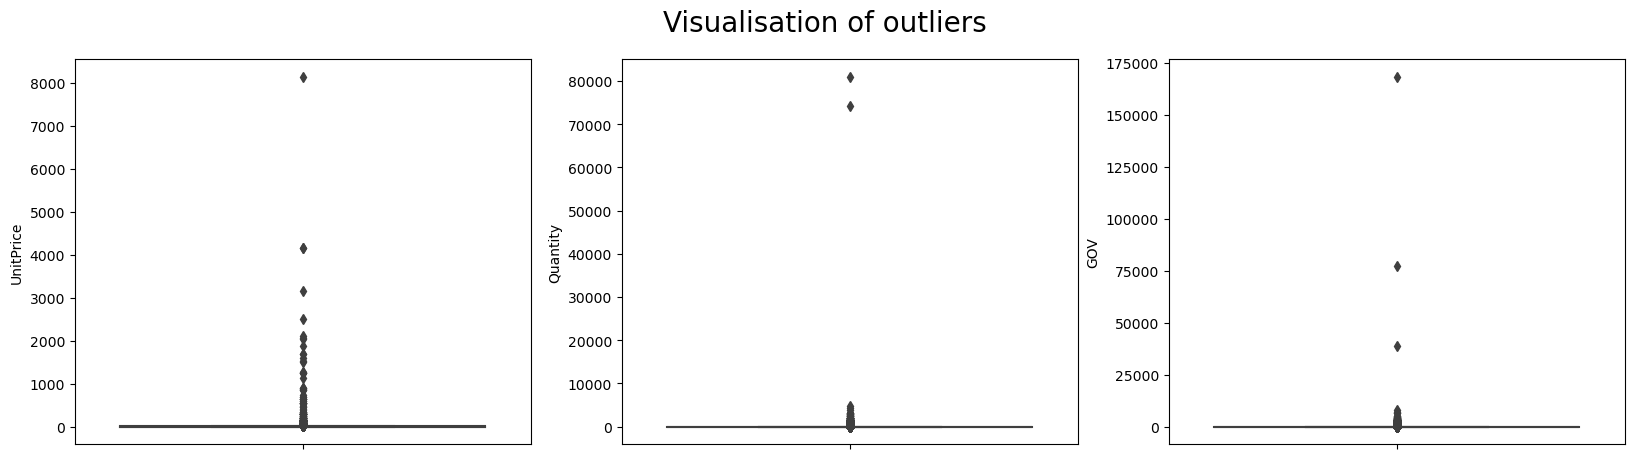

In [26]:
fig = plt.figure(figsize = (20,5))
fig.suptitle("Visualisation of outliers",size=20)

axes = fig.add_subplot(1, 3, 1)
sns.boxplot(data=data,y="UnitPrice")

axes = fig.add_subplot(1, 3, 2)
sns.boxplot(data=data,y="Quantity")

axes = fig.add_subplot(1, 3, 3)
sns.boxplot(data=data,y="GOV")

In [27]:
from scipy import stats
data= data[(np.abs(stats.zscore(data[["GOV"]])) < 2).all(axis=1)]

#  Exploratory Data Analysis
> 

# Power BI Screen shot
![Alt Text](https://github.com/rahulnk09/iNeuBytes/blob/main/Power%20Bi%20DashBoard.png?raw=true)

> Sales are at it's peak during **September, October & November** of 2011

Text(0.5, 1.0, 'Sale Trend')

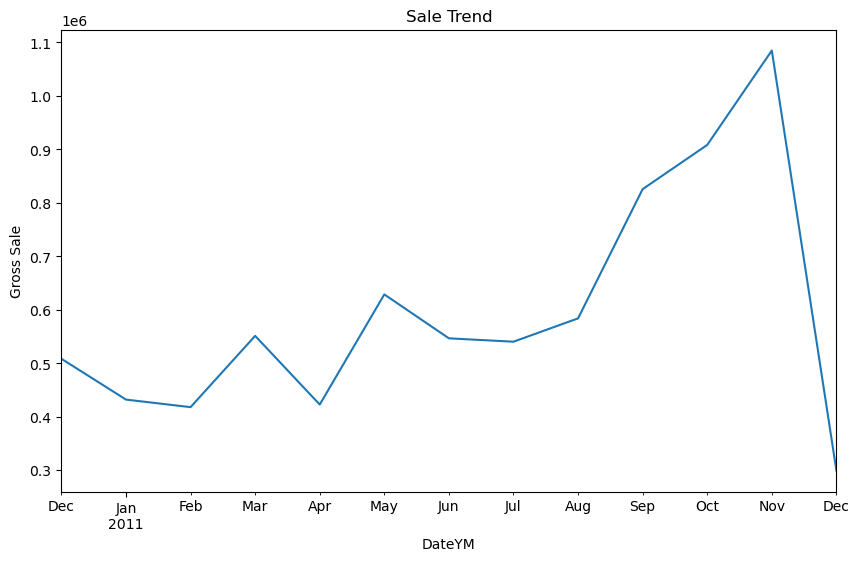

In [28]:
plt.figure(figsize=(10,6))
data.groupby('DateYM')['GOV'].sum().plot()
plt.ylabel('Gross Sale')
plt.title('Sale Trend')

In [29]:
grouped=data.groupby('Day of the week').agg({'GOV':'sum','InvoiceNo':'nunique'})
grouped=grouped.reset_index().rename(columns={'GOV':'Gross_Sales_day','InvoiceNo':'Total Order/day'})
#grouped.loc[len(grouped)]=[5,0,0]
#grouped=grouped.sort_values(by='Day of the week')

In [30]:
grouped

,Day of the week,Gross_Sales_day,Total Order/day
0,0,1239914.821,2843
1,1,1372517.381,3151
2,2,1472301.260,3431
3,3,1730666.610,4007
4,4,1170933.601,2803
5,6,762930.981,2168


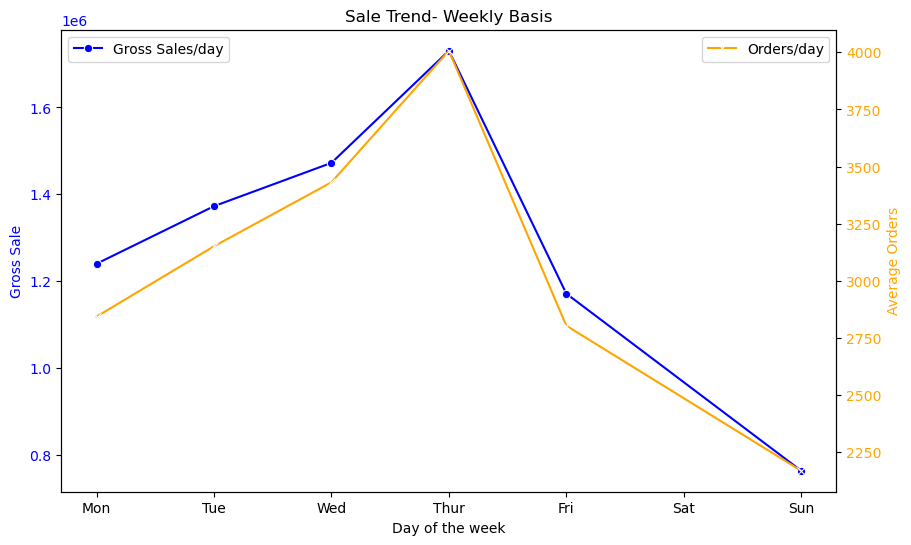

In [31]:
plt.figure(figsize=(10,6))
#ax=data.groupby('Day of the week')['GOV'].sum().plot(color='r',marker='o',label='Gross Sale')
ax1=sns.lineplot(data=grouped,x='Day of the week',y='Gross_Sales_day',marker='o',color='b')
ax1.legend(['Gross Sales/day' ],loc='upper left')
plt.ylabel('Gross Sale',color='b')
plt.title('Sale Trend- Weekly Basis')
ax1.tick_params(axis='y', labelcolor='b')

ax2=ax1.twinx()
sns.lineplot(data=grouped,x='Day of the week',y='Total Order/day',ax=ax2,marker='x',color='orange',label='Orders/day')
ax2.legend(loc='upper right')
#ax2.set_yticks([4,8,12,16,20,24,28,32,36])
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylabel('Average Orders',color='orange')
ax1.set_xticks(ticks=[0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
#ax2.set_xticks(ticks=[0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])


> **The sales are highest on the Wednesday**
> > Saturday is holiday as there no orders recieved 

In [32]:
grouped=data.groupby('Country').agg({'GOV':'sum'}).reset_index().rename(columns={'GOV':'Gross sales'}).sort_values(by='Gross sales',ascending=False).head(10)

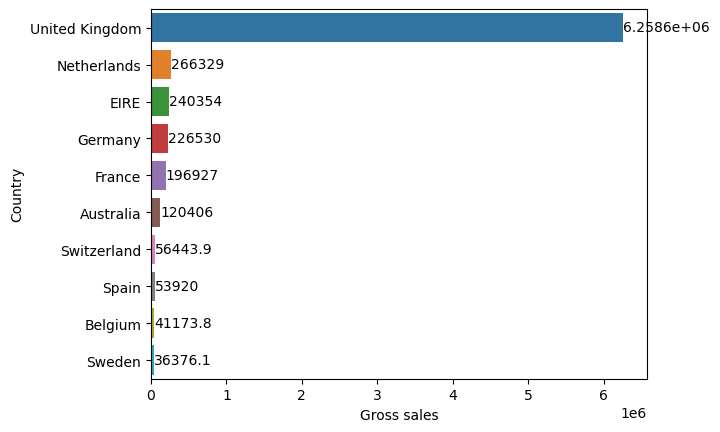

In [33]:
ax=sns.barplot(grouped,x='Gross sales',y='Country')

for i in ax.containers:
    ax.bar_label(i,)

In [34]:
group=pd.DataFrame(data.groupby(['Country','Description'])['GOV'].sum())
best=pd.DataFrame(group.groupby('Country')['GOV'].idxmax().values.tolist(),columns=['Country','Product'])
best['sales']=group.groupby('Country')['GOV'].max().values.tolist()
best['total sales']=group.groupby('Country')['GOV'].sum().values.tolist()
best=best.sort_values(by='total sales',ascending=False).head(5)
best['% of total sales']=best['sales']/best['total sales']

best.style.background_gradient(cmap=sns.light_palette("seagreen", as_cmap=True), subset=["% of total sales"])

,Country,Product,sales,total sales,% of total sales
35,United Kingdom,REGENCY CAKESTAND 3 TIER,86318.650000,6258603.934000,0.013792
23,Netherlands,ROUND SNACK BOXES SET OF4 WOODLAND,7991.400000,266328.580000,0.030006
10,EIRE,REGENCY CAKESTAND 3 TIER,5410.350000,240353.870000,0.022510
14,Germany,POSTAGE,21001.000000,226530.370000,0.092707
13,France,POSTAGE,15454.000000,196926.680000,0.078476


In [35]:
data.reset_index()
number_customers = data.groupby('DateYM')["CustomerID"].nunique()
number_customers = pd.DataFrame(data=number_customers).reset_index()


number_new_customers = []
customers_seen = []
for month in data['DateYM'].unique():
    customers = data[data["DateYM"] == month].CustomerID.unique()
    count=0
    for customer in customers:
        if customer not in customers_seen:
            count+=1
            customers_seen.append(customer)
    number_new_customers.append((month,count))
number_new_customers = pd.DataFrame(number_new_customers,columns=["Date","New customers"])
number_new_customers.Date = number_new_customers.Date.dt.to_timestamp()

In [36]:
dates=[pd.to_datetime("2010-12",format=("%Y-%m"))]
dates+=[pd.to_datetime("2011-"+str(month),format="%Y-%m") for month in range(1,13)]
number_customers['DateYM']=number_new_customers['Date']


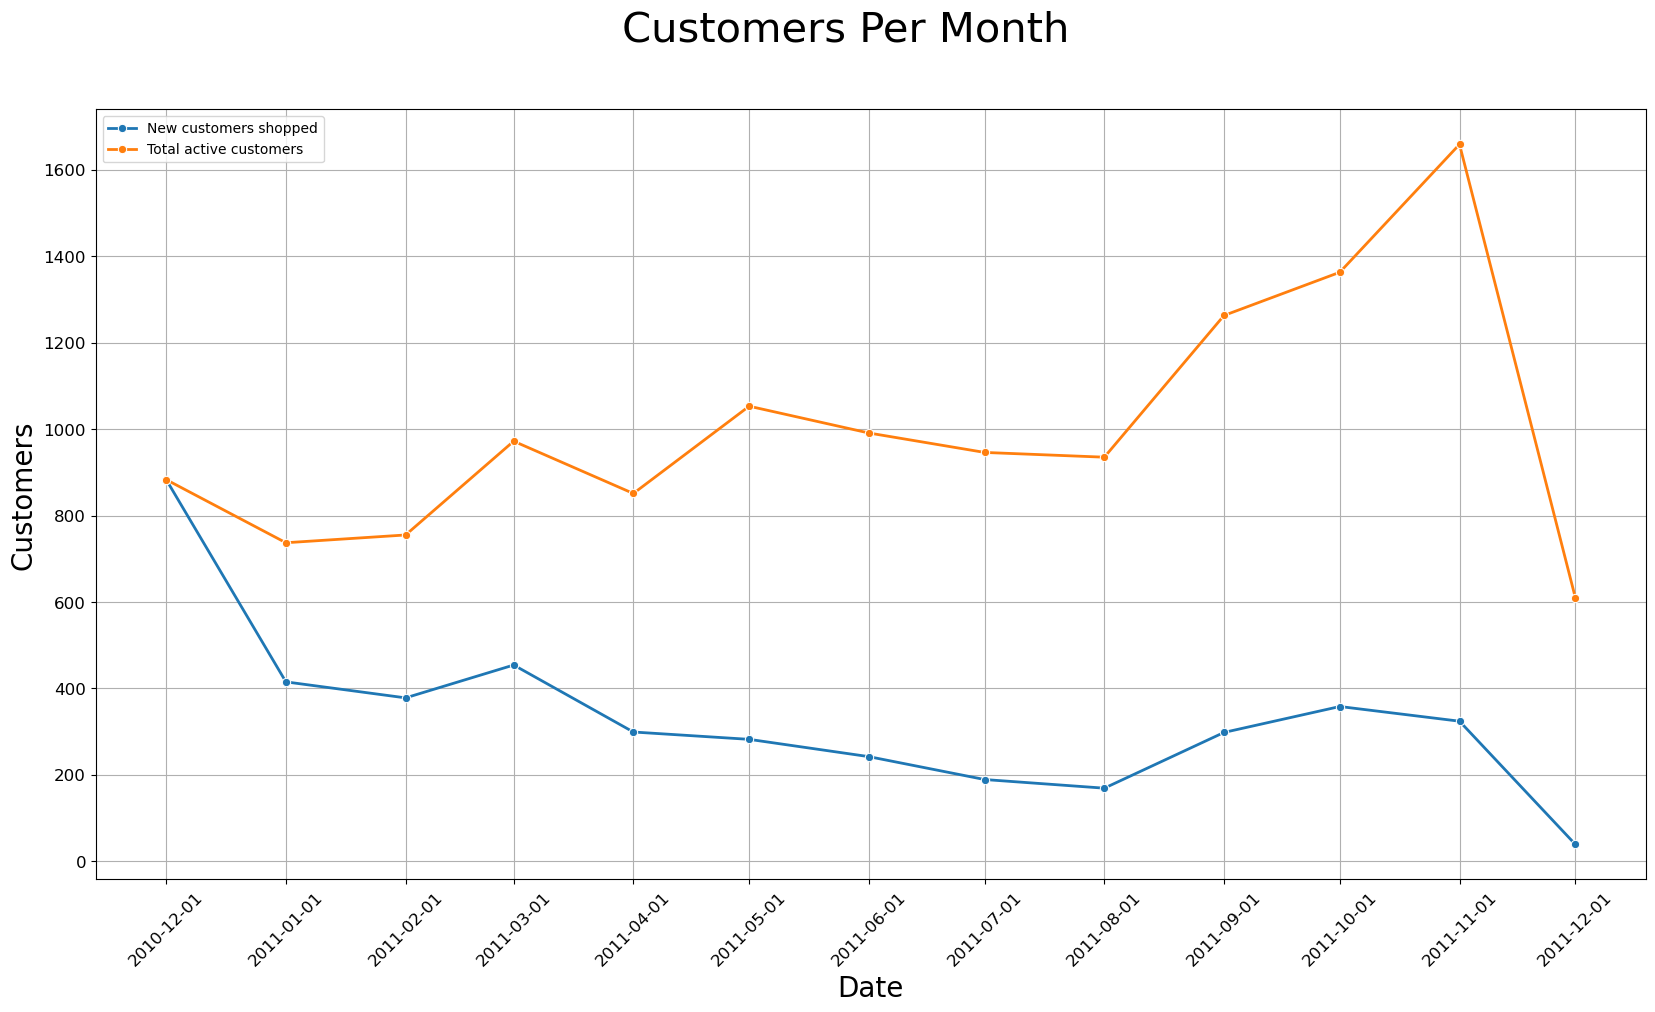

In [37]:
fig  = plt.figure(figsize = (20,10)).suptitle('Customers Per Month', fontsize=30)
lineplot = sns.lineplot(data=number_new_customers,x="Date", y="New customers", marker="o",linewidth = 2, label="New customers shopped")
sns.lineplot(ax=lineplot,data=number_customers,x="DateYM", y="CustomerID", marker="o",linewidth = 2, label="Total active customers")

lineplot.set_xlabel("Date",fontsize=20)
lineplot.set_ylabel("Customers",fontsize=20)
plt.xticks(dates,rotation = 45,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

> New Customers shopped on the online ecommerce paltform got stabilised in the 2011 and decreased sharply by the end of the year --> Which **needs attention**

> Customers traffic on the platform increased during Sept,Oct,Nov of 2011, which accounts for the rise in total sales

In [38]:
today_date = dt.datetime(2012, 1, 1)
data1=data[data['Year']>2010]
X=data1.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date- InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'GOV' : lambda TotalPrice: TotalPrice.sum()})
X.columns = ['recency', 'frequency', 'Annual Spends']


<Axes: >

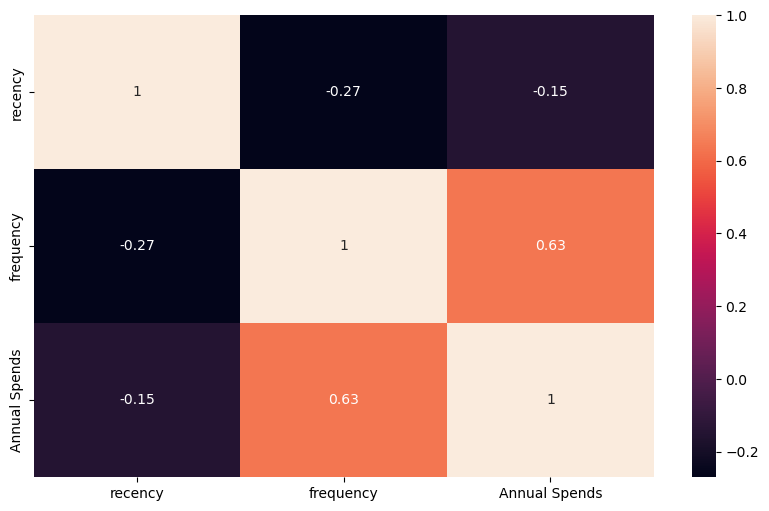

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(),annot=True)

In [40]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
columns_to_scale=['recency','frequency']
X[columns_to_scale]=sts.fit_transform(X[columns_to_scale])

In [41]:
y=X['Annual Spends']
X.drop('Annual Spends',axis=1,inplace=True)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
grid=GridSearchCV(ridge,params,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Best value for lambda :  {'alpha': 55}
Best score for cost function:  -26478221.232440926


In [45]:
best_ridge=Ridge(alpha=55)
best_ridge.fit(X_train,y_train)
y_pred1=best_ridge.predict(X_test)

In [46]:
rf=RandomForestRegressor()
params={
    'max_features': ['log2'],
    'n_estimators': [300,500]}
grid= GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 10, verbose = 2,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=300; total time=   1.1s
[CV] END ................max_features=log2, n_estimators=500; total time=   1.8s
[CV] END ................max_features=log2, n_es

In [47]:
best_rf=RandomForestRegressor(max_features='log2',n_estimators=500)
best_rf.fit(X_train,y_train)
y_pred2=best_rf.predict(X_test)

In [48]:
print('Root Mean Squared Error of Ridge Regressor is ',mean_squared_error(y_pred1,y_test,squared=False))
print('Root Mean Squared Error of random Forest Regressor is ',mean_squared_error(y_pred2,y_test,squared=False))

Root Mean Squared Error of Ridge Regressor is  3953.5406689445226
Root Mean Squared Error of random Forest Regressor is  4684.68513327977


# RFM - Analysis

In [49]:

rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'GOV' : lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']

In [50]:
#more days since last purchase 1 (very bad) ; those with fewer days 5 (very good).
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

#5 (very good) for those with high purchasing frequency; the ones that were less as 1 (very bad).
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

#5 (very good) for those with a high purchase price;  the fewer purchase price as 1 (very bad).
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#we'll not include monetory_score.
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

In [51]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    
    r'[3-4][1-3]': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    
    r'51': 'new_customers',
    r'5[2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12347.0,24,7,4310.00,5,5,5,55,champions
1,12348.0,97,4,1744.44,2,4,4,24,at_Risk
2,12349.0,40,1,1757.55,4,1,4,41,need_attention
3,12350.0,332,1,334.40,1,1,2,11,hibernating
4,12352.0,58,8,1849.49,3,5,4,35,loyal_customers


In [52]:
segments_count = rfm.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head(9)

,segment,count
0,at_Risk,593
1,cant_loose,62
2,champions,655
3,hibernating,1070
4,loyal_customers,793
5,need_attention,909
6,new_customers,46
7,potential_loyalists,202


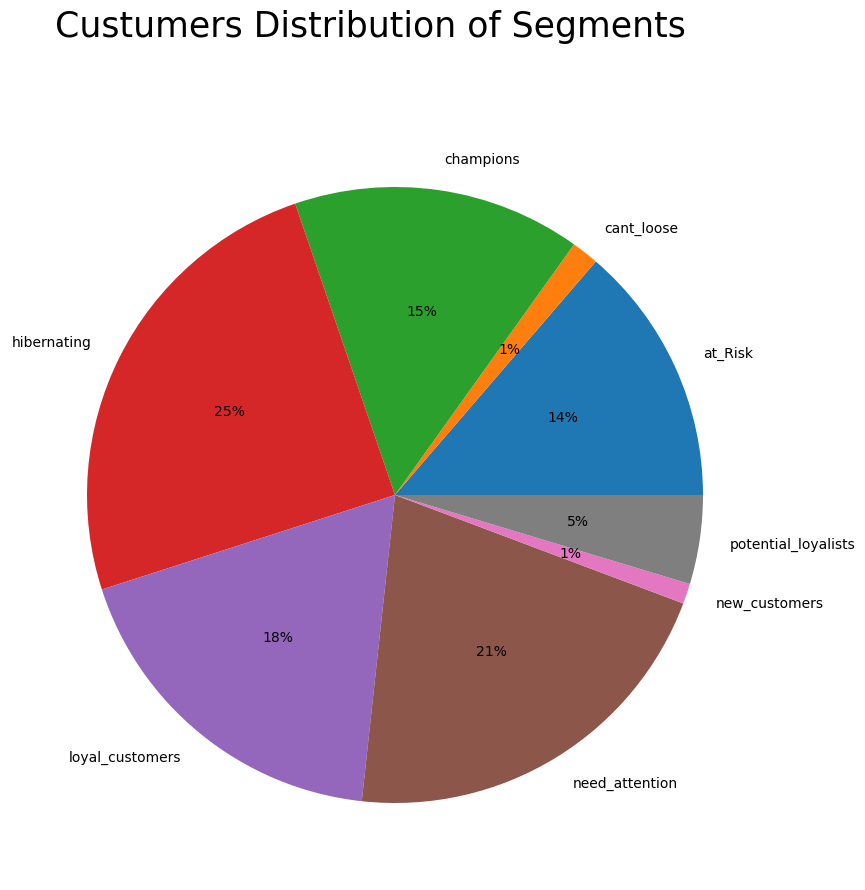

In [53]:
fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=25)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [54]:
agg_list=["mean", "count", "max"]
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(agg_list)

recency             frequency                monetary  \
                           mean count  max       mean count  max         mean   
segment                                                                         
at_Risk              174.224283   593  395   2.878583   593    6   927.769093   
cant_loose           154.387097    62  394   8.338710    62   34  2641.406935   
champions             27.683969   655   36  12.164885   655  208  5797.777008   
hibernating          238.763551  1070  395   1.098131  1070    2   401.174160   
loyal_customers       55.171501   793   93   6.421185   793   61  2684.639018   
need_attention        62.343234   909   93   1.620462   909    3   585.373872   
new_customers         29.347826    46   36   1.000000    46    1   288.625652   
potential_loyalists   28.980198   202   36   2.103960   202    3   664.503416   

                                      
                    count        max  
segment                               
at_Risk               593   11072.67  
cant_loose             62   10254.18  
champions             655  261088.26  
hibernating          1070    9864.26  
loyal_customers       793  106883.65  
need_attention        909    6207.67  
new_customers          46     848.55  
potential_loyalists   202    3452.73

> There are **19% of Champions & Potential Loyalists** who make the most transactions 
> > Giving some extra discounts can help to retain them for a longer period

> Apparently,there is a segment of **21% which needs attentio**n to increase their frequency of transcation. This can be done by targeted campainging

# K-Means Clustering :

In [55]:
df_c=data.groupby('CustomerID').agg({ 'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,'InvoiceNo':'nunique'})
df_c.columns = ['recency', 'frequency']

In [56]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_c)
df_scaled
df_scaled = pd.DataFrame(df_scaled,columns=['recency','frequency'])
df_scaled["CustomerID"] = df_c.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

**Finding the optimal clusters using elbow method**

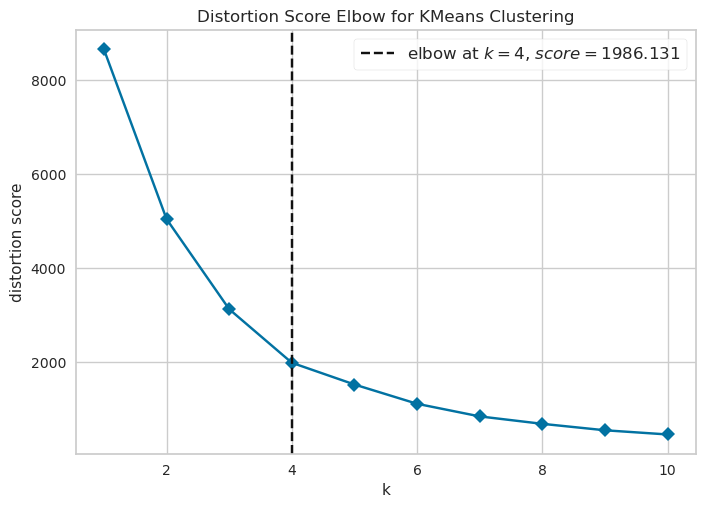

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()        

In [58]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = df_scaled.columns )
centroid_df

,recency,frequency
0,-0.480754,-0.100609
1,1.559092,-0.353054
2,-0.910102,16.302255
3,-0.804242,2.123605


<Figure size 1500x1500 with 0 Axes>

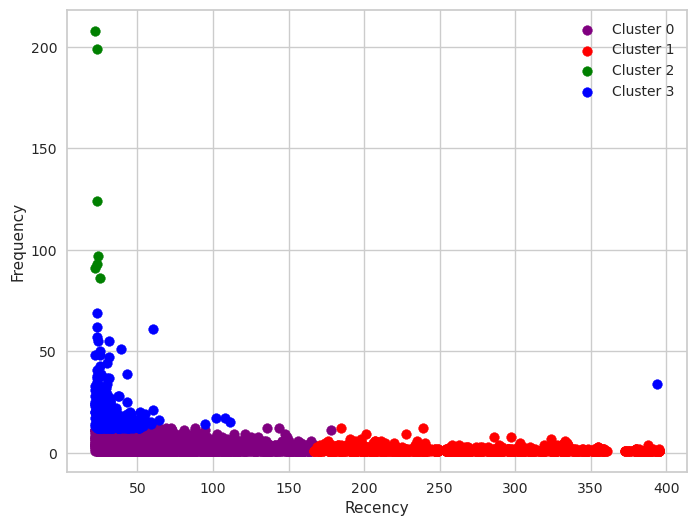

In [59]:
df_kmeans = df_c.copy()
df_kmeans['labels'] = kmeans.labels_.tolist()


colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
# Define colors for each label
label_colors = {0: 'purple', 1: 'red', 2: 'green', 3: 'blue'}

# Scatter plot
plt.figure(figsize=(8, 6))

for label, color in label_colors.items():
    label_data = df_kmeans[df_kmeans['labels'] == label]
    plt.scatter(label_data['recency'], label_data['frequency'], c=color, label=f'Cluster {label}')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
agg_list=["mean", "count", "max",]
df_kmeans[["labels", "recency", "frequency"]].groupby("labels").agg(agg_list)

recency              frequency           
              mean count  max        mean count  max
labels                                              
0        66.060120  2994  178    3.484636  2994   12
1       269.961466  1064  395    1.563910  1064   12
2        23.142857     7   25  128.285714     7  208
3        33.724528   265  394   20.407547   265   69

**Cluster 0 - Infrequent Customers**

**Cluster 1 - Dormant Customers**

**Cluster 2 - Highly engaging Customers**

**Cluster 3 - Regular One's**

In [61]:
df_c=data.groupby('CustomerID').agg({ 'GOV':'sum'})
df_c.columns = ['Expenditure']


In [62]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_c)
df_scaled
df_scaled = pd.DataFrame(df_scaled,columns=['Expenditure'])
df_scaled["CustomerID"] = df_c.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

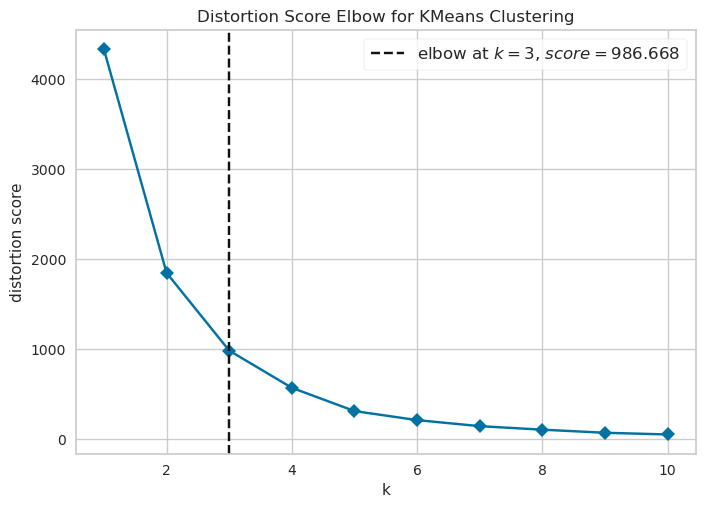

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)        
visualizer.show()    

In [64]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = df_scaled.columns )
centroid_df

,Expenditure
0,-0.058922
1,30.959444
2,7.367866


**Cluster 0 - Low Spenders**

**Cluster 1 - High Spenders**

**Cluster 2 - Med Spenders**

<Figure size 1500x1500 with 0 Axes>

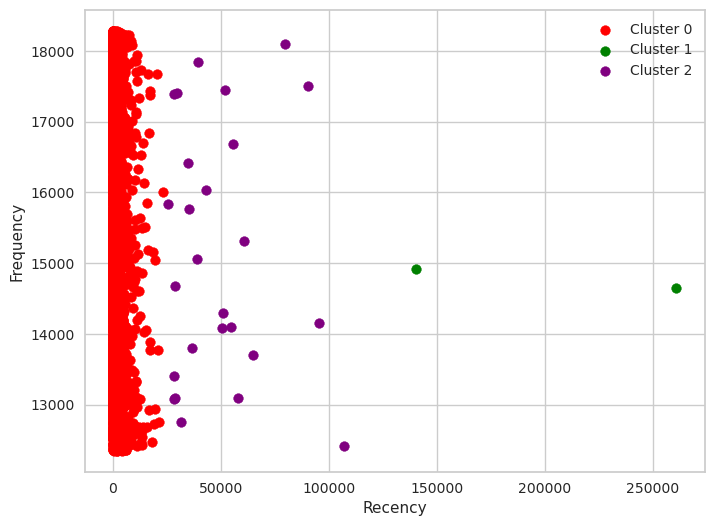

In [65]:
df_kmeans = df_c.copy()
df_kmeans['labels'] = kmeans.labels_.tolist()
df_kmeans.reset_index(inplace=True)

fig  = plt.figure(figsize = (15,15)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
# Define colors for each label
label_colors = {0: 'red', 1: 'green', 2: 'purple'}

# Scatter plot
plt.figure(figsize=(8, 6))

for label, color in label_colors.items():
    label_data = df_kmeans[df_kmeans['labels'] == label]
    plt.scatter(label_data['Expenditure'], label_data['CustomerID'], c=color, label=f'Cluster {label}')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()